<a href="https://colab.research.google.com/github/arijitar/Machine-Learning/blob/main/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [14]:
X,y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [16]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0 )

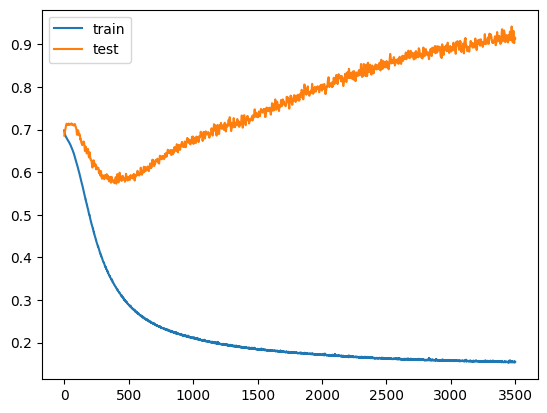

In [21]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# plt.plot(history.history['accuracy'],label='train')
# plt.plot(history.history['val_accuracy'], label='test')
# plt.legend()
# plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


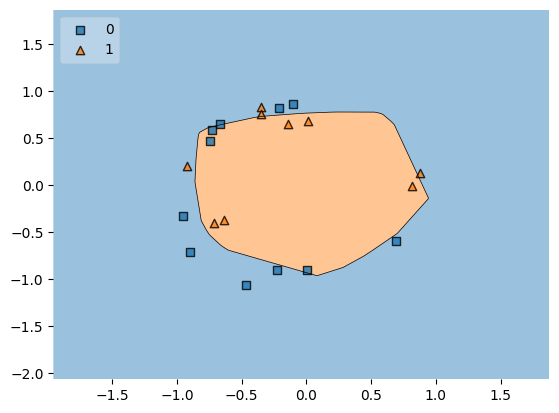

In [22]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

# Early Stopping

In [23]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
    )

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks = callback )

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9492 - loss: 0.1326 - val_accuracy: 0.6500 - val_loss: 1.0129
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9000 - loss: 0.1706 - val_accuracy: 0.6500 - val_loss: 1.0059
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9258 - loss: 0.1733 - val_accuracy: 0.6500 - val_loss: 0.9984
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9477 - loss: 0.1535 - val_accuracy: 0.6500 - val_loss: 0.9923
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9414 - loss: 0.1426 - val_accuracy: 0.6500 - val_loss: 0.9903
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9531 - loss: 0.1389 - val_accuracy: 0.6500 - val_loss: 0.9893
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9336 - loss: 0.1495 - val_accuracy: 0.6500 - val_loss: 0.9926
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9258 - loss: 0.1701 - val_accuracy: 0.6500 - 

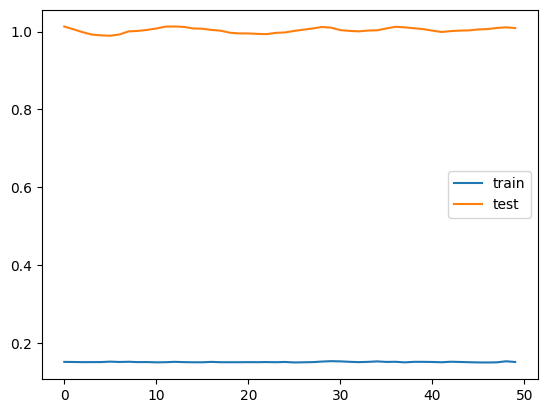

In [30]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


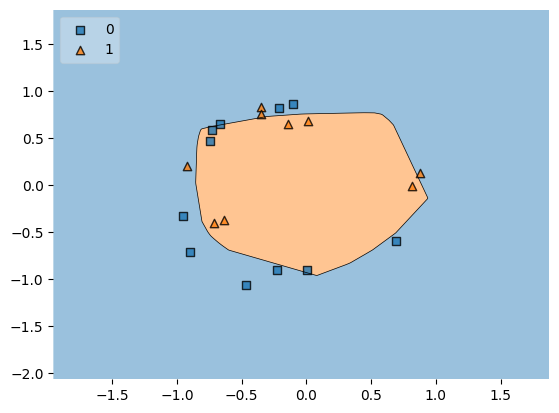

In [31]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()